# Homework 1

Tianyi Wang, tw2567

## 1

### (a)

In [699]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import expit

In [339]:
def GSAMPLE(mu,sigma,n):
    d=len(mu)
    s,U=la.schur(sigma)
    s=np.diagonal(s)
    s=diag(s)
    S=sqrt(s)
    U=mat(U)
    S=mat(S)
    g=np.random.randn(n,d).T
    MU=np.tile(mu,(n,1))
    G=U*S*mat(g)+mat(np.array(MU).T)
    return(G.T)

### (b)

In [328]:
G=GSAMPLE([1,1],[[2,1],[1,2]],5000)

**mean**

In [329]:
GT=G.T
print(np.mean(GT[0]),np.mean(GT[1]))

0.995300548305 1.01340731384


**covariance matrix**

In [330]:
np.cov(GT)

array([[ 1.9856911 ,  1.02267455],
       [ 1.02267455,  1.98322552]])

### (C)

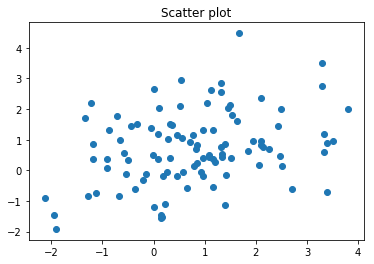

In [406]:
G=GSAMPLE([1,1],[[2,1],[1,2]],100)
GT=G.T
x=np.array(GT[0])
y=np.array(GT[1])
plt.scatter(x,y)
plt.title('Scatter plot')
plt.show()

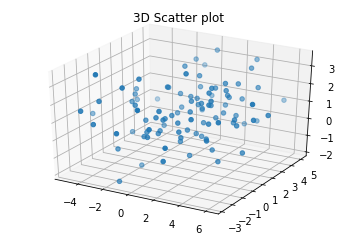

In [375]:
G=GSAMPLE([1,1,1],[[5,2,0],[2,3,1],[0,1,1]],100)
GT=G.T
x=np.array(GT[0])
y=np.array(GT[1])
z=np.array(GT[2])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.title('3D Scatter plot')
plt.show()

## 2

### (a)

In [380]:
def plot(n,nbins=[10,10,10,10]):
    for i in range(len(nbins)):
        x=np.random.randn(n)
        plt.subplot(221+i)
        plt.hist(x,bins=nbins[i])
        title="n="+str(n)+","+"nbins="+str(nbins[i])
        plt.title(title)
    plt.show()

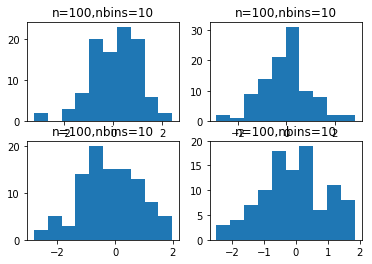

In [382]:
plot(100)

### (b)

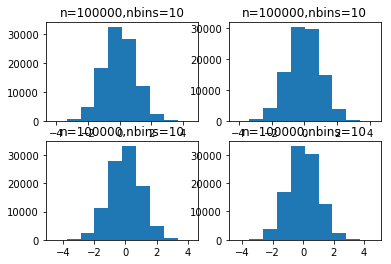

In [383]:
plot(100000)

### (c)

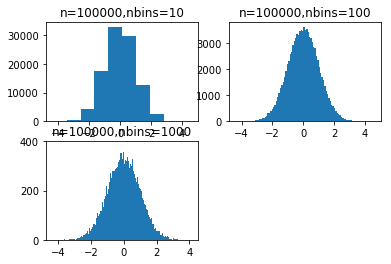

In [384]:
plot(100000,[10,100,1000])

### (d)

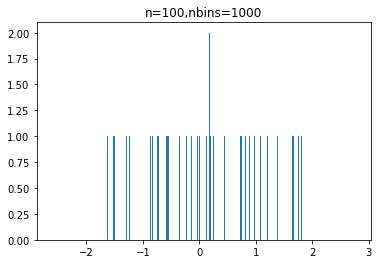

In [385]:
x=np.random.randn(100)
plt.hist(x,bins=1000)
title="n="+str(100)+","+"nbins="+str(1000)
plt.title(title)
plt.show()

### (e)

The bigger the sample size, the more reliable the estimates.

## 3

### (a)

In [625]:
points0=GSAMPLE([0,-1],[[1,0.5],[0.5,1]],100).T
points1=GSAMPLE([0,1],[[1,-0.5],[-0.5,1]],100).T
x0=np.array(points0[0])
y0=np.array(points0[1])
x1=np.array(points1[0])
y1=np.array(points1[1])
l0=[0]*100
l1=[1]*100
p0=np.array(GSAMPLE([0,-1],[[1,0.5],[0.5,1]],100).T)
p1=np.array(GSAMPLE([0,1],[[1,-0.5],[-0.5,1]],100).T)
ll1=[l1,p0[0].tolist(),p0[1].tolist()]
m1=mat(np.array(ll1)).T
ll2=[l1,p1[0].tolist(),p1[1].tolist()]
m2=mat(np.array(ll2)).T
m1=np.asarray(m1)
m2=np.asarray(m2)
X=np.row_stack((m1,m2))
l0.extend(l1)
y=l0

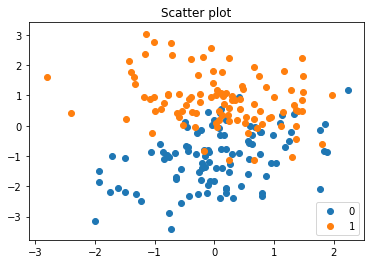

In [701]:
plt.scatter(x0,y0,label="0")
plt.scatter(x1,y1,label="1")
plt.title('Scatter plot')
plt.legend(loc='lower right')
plt.show()

### (b)

In [684]:
def inner(w,X):
    m=w*X
    results=[]
    for i in range(len(X)):
        results.append(sum(m[i]))
    return(results)
    
def neg_likelihood(w,X,y):
    ip=inner(w,X)
    L=[]
    for i in range(len(X)):
        l=y[i]*log(1/(1+exp(-ip[i])))+(1-y[i])*log(1/(1+exp(ip[i])))
        L.append(l)
    return(-sum(L))

def grad(w,X,y):
    ip=inner(w,X)
    diff=1/(1+exp(-np.asarray(ip)))-y
    gradient=np.dot(diff,X)
    return(gradient)

### (c)

In [694]:
def grad_desc(w=[0,0,0], X=X, y=y, lr=.001, converge_change=.001):
    #setup cost iter
    cost_iter = []
    cost = neg_likelihood(w,X,y)
    cost_iter.append(cost)
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        w = w - (lr * grad(w,X,y))
        cost = neg_likelihood(w,X,y)
        cost_iter.append(cost)
        change_cost = old_cost - cost
        i+=1
    return w, np.array(cost_iter)

In [695]:
result=grad_desc()
print("final w: "+str(result[0]))

final w: [ 0.11611165 -0.28470659  1.79824833]


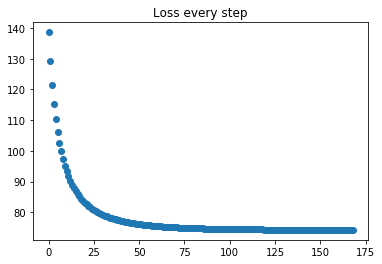

In [702]:
plt.scatter(range(len(result[1])),result[1])
plt.title('Loss every step')
plt.show()